In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import datetime as dt
import yfinance as yf
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [6]:
stock = "HPG.VN"
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2022, 1, 1)
df = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,HPG.VN,HPG.VN,HPG.VN,HPG.VN,HPG.VN
0,2015-01-05,4858.173828,4949.837891,4812.342285,4858.173828,2258457
1,2015-01-06,4904.005859,4904.005859,4766.510254,4766.510254,2840587
2,2015-01-07,4858.173828,4949.837891,4858.173828,4904.005859,2539379
3,2015-01-08,4858.173828,4904.005859,4812.342285,4858.173828,1171440
4,2015-01-09,4949.837891,4949.837891,4812.342285,4858.173828,4464459


In [8]:
data_train = df[['Close']].values

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

data_training = scaler.fit_transform(data_train)

x_train, y_train = [], []
no_of_sample = len(data_train)

In [12]:
for i in range(60, no_of_sample):
    x_train.append(data_training[i-60:i, 0])
    y_train.append(data_training[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)
model.save("stock_future.keras")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0368
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0028
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0022
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0021
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0025
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0018
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0019
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0017
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0017
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0021
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0023
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0017
Epoch 13/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0020
Epoch 14/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0016
Epoch 15/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - lo

In [19]:
stock = "HPG.VN"
start = dt.datetime(2023, 1, 1)
end = dt.datetime(2023, 12, 1)
real_data_price = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [20]:
real_stock_price = real_data_price[['Close']].values

In [39]:

data_total = pd.concat((df['Close'], real_data_price['Close']), axis = 0)
inputs= data_total[len(data_total) - len(real_data_price) - 60:].values
inputs= inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [40]:
x_test = []
no_of_sample = len(inputs)

In [41]:
for i in range(60, no_of_sample):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


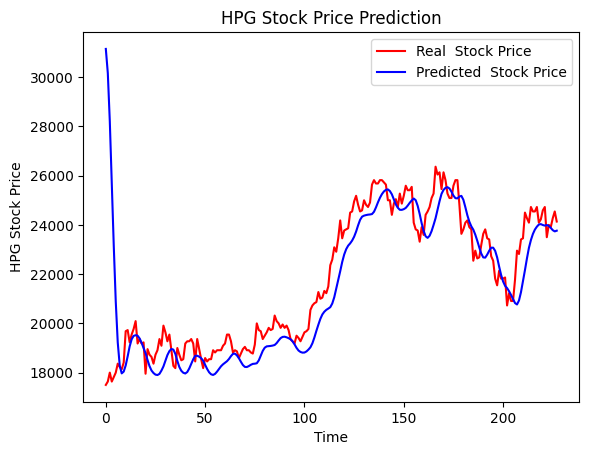

In [42]:
plt.plot(real_stock_price, color = 'red', label = 'Real  Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted  Stock Price')
plt.title('HPG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HPG Stock Price')
plt.legend()
plt.show()